In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [166]:
review_df = pd.read_csv("/content/IMDB Dataset.csv")
review_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [167]:
review_df.shape

(50000, 2)

In [168]:
review_df.isnull().sum()

,0
review,0
sentiment,0


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

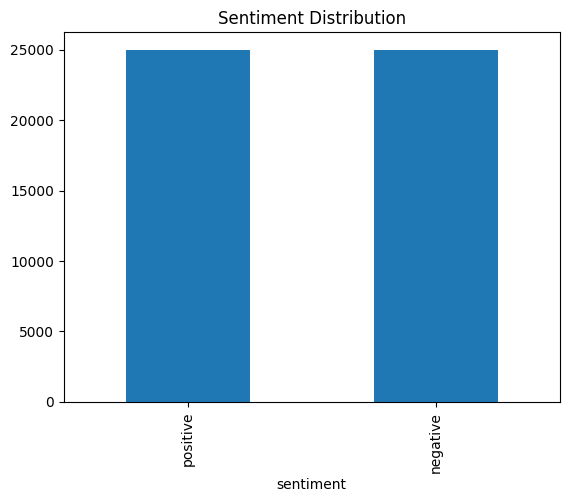

In [169]:
review_df['sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment Distribution')

In [170]:
def pre_processing(text):
  text = text.lower()
  text = re.sub(r'<.*?>','',text)
  text = re.sub(r"[^a-zA-Z']", ' ', text)
  text = text.translate(str.maketrans('','', string.punctuation))
  tokens = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english')) - {'not', 'no'}
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

review_df["Cleaned_review"] = review_df["review"].apply(pre_processing)


In [171]:
review_df['sentiment'] = review_df['sentiment'].map({'positive':1, 'negative':0})

In [172]:
X_train, X_test, y_train, y_test = train_test_split(review_df['Cleaned_review'], review_df['sentiment'], test_size =0.2, random_state = 1)

In [190]:
Tdfidf = TfidfVectorizer(max_features=40000, ngram_range=(1, 3))
X_train_vec = Tdfidf.fit_transform(X_train)
X_test_vec = Tdfidf.transform(X_test)

In [195]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [196]:
y_pred = model.predict(X_test_vec)

Accuracy of the model is: 0.9022




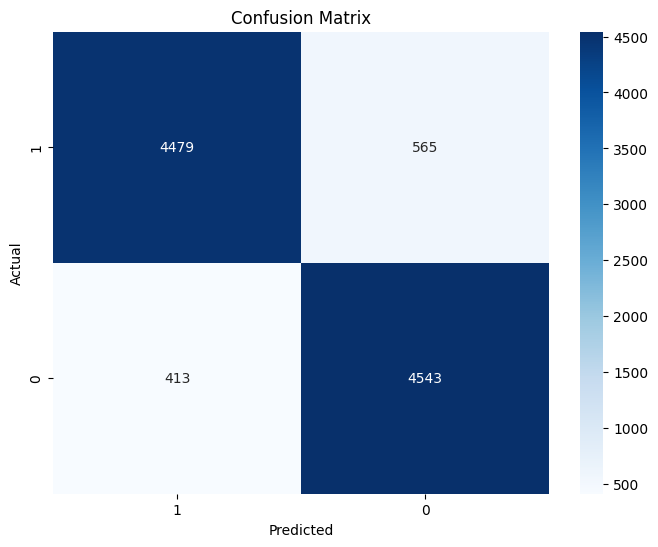



              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5044
           1       0.89      0.92      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [197]:
print("Accuracy of the model is:", accuracy_score(y_test, y_pred))
print('\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 0],
            yticklabels=[1, 0])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print('\n')
print(classification_report(y_test, y_pred))

In [198]:
review = "It is a disaster movie. It had a very bad storyline and also very bad VFX."
vec = Tdfidf.transform([review])
pred = model.predict(vec)
print("Predicted Sentiment:", pred[0])

Predicted Sentiment: 0
